In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Discrete Probability Distribution: Binomial 
* A T-shirt manufacturing company regularly conducts quality checks at specified period on the products it manufactures. Their empirical data of manufacturing report says,4% of their products were defective. Suppose a random sample of 250 T-shirts were picked from the manufacturing unit,what is the probability that,
* a) None of the T-shirts are defective
* b) 5 or fewer T-shirts are defective
* c) 20 or more T-shirts are defective
* d) What is the mean value of this Binomial Distribution 
* e) Plot the Binomial Distribution

In [4]:
import scipy.stats as stats

In [ ]:
#a) we need to calculate P(x=0) = n C x*P^x*Q^(n-x)
#Here n=250, x=0, P=defective % = 4%=0.04, Q= Non-defective % = 96% = 0.96
n=250
p=0.04
stats.binom.pmf(0,n,p)

3.696649374485171e-05

In [ ]:
#b) 5 or fewer => P(x<=5)= P(x=0)+P(x=1)+P(x=2)+P(x=3)+P(x=4)+P(x=5)
stats.binom.cdf(5,n,p)

0.06329328366342199

In [ ]:
#c) 20 or more => P(x>=20)= P(x=20)+........+ all cummulative probabilities in right hand side
1-stats.binom.cdf(19,n,p)

0.002814404938111137

In [ ]:
#d)Mean value of Binomial distribution = n*p
#Here, mean implies 4% of 250
0.04*250

10.0

In [ ]:
stats.binom.pmf(10,n,p)

0.12768812205208388

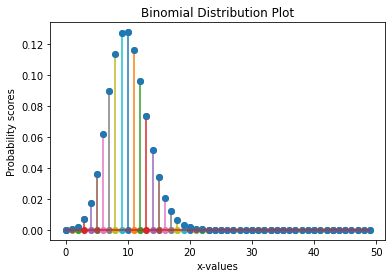

In [ ]:
#e) to generate the plot,we need to define x-axis
x=np.arange(0,50)
binom_dist=stats.binom.pmf(x,n,p)
plt.stem(x,binom_dist,'o-')
plt.xlabel('x-values')
plt.ylabel('Probability scores')
plt.title('Binomial Distribution Plot')
plt.show()

In [ ]:
x.dot(binom_dist) #this is analogous to the notion summation of x.p(x)

9.999999999999698

In [ ]:
np.argmax(binom_dist),np.max(binom_dist)

(10, 0.12768812205208388)

In [ ]:
sd=np.sqrt(((x-10)**2).dot(binom_dist))  #more generic formula
sd

3.0983866769658617

In [ ]:
np.sqrt(n*p*(1-p))

3.0983866769659336

* We could notice,the peak probability score of 12.76% at the mean value (10 T-shirts) 

# Discrete Probability Distribution: Poisson
#### A customer care unit of a fiber optic broadband service provider receives on an average 30 emails on a day regarding complaint in their service. To strategically plan the resource of service engineers, the following calculations are performed


---------------
a) What is the probability of receiving 100 complaints  in a given day?

b)What is the probability of receiving 20 or less complaints in a given day? 

c)What is the probability of receiving 35 or more complaints in a given day?

d)Plot the poisson distribution 

In [ ]:
#a) we need to calculate P(x=100)
#Here Lambda = 30 emails (average)
lamb=30
stats.poisson.pmf(100,lamb)

5.1675818018385396e-24

In [ ]:
#b)P(x<=20)
stats.poisson.cdf(20,lamb)

0.035284618454228846

In [ ]:
#c) P(x>=35)
1-stats.poisson.cdf(34,lamb)

0.20269167451688286

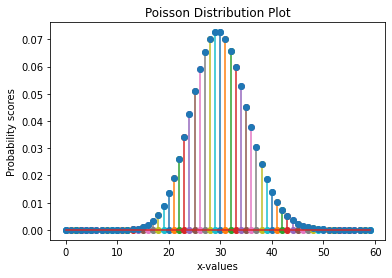

In [ ]:
x=np.arange(0,60)
pois_dist=stats.poisson.pmf(x,lamb)
plt.stem(x,pois_dist,'o-')
plt.xlabel('x-values')
plt.ylabel('Probability scores')
plt.title('Poisson Distribution Plot')
plt.show()

In [ ]:
np.argmax(pois_dist)

29

In [ ]:
pois_dist[29]

0.07263452647159181

In [ ]:
pois_dist[30]

0.07263452647159181

* We can notice the highest probability centered around the mean (ie) 30 complaints

In [ ]:
np.sqrt(x.dot(pois_dist)) #cross checking the mean value from histogram perspective x.P(x)

5.477220430202007

In [ ]:
np.sqrt(((x-30)**2).dot(pois_dist))


5.477144707167058

#Normal Distribution
| Value of the random variable | Area under the normal distribution (CDF) |
| --------------------------------- | --------------------------|
| $\mu - \sigma \leq x \leq \mu + \sigma$ | 0.6828 |
| $\mu - 2\sigma \leq x \leq \mu + 2\sigma$ | 0.9545 |
| $\mu - 3\sigma \leq x \leq \mu + 3\sigma$ | 0.9974 |

* Based on last 5 year statistics, an app based food delivery company declared its statistics at Chennai, saying the average delivery time to any part of Chennai is 90 min, with a standard deviation of 20 min. Compute the following,
* a) What proportion of delivery were done less than 60 min?
* b) What proportion of delivery were done more than 100 min?
* c) What proportion of delivery were done between 30min to 60min?




In [ ]:
#a) 
stats.norm.cdf(60,90,20)

0.06680720126885807

In [9]:
1-stats.norm.cdf(60,50,20)

0.3085375387259869

In [ ]:
(60-90)/20

-1.5

In [6]:
#OR alternatively we can pass the 
stats.norm.cdf(-1.0)

0.15865525393145707

In [10]:
#b)
1-stats.norm.cdf(100,90,20)

0.3085375387259869

In [11]:
#c)
stats.norm.cdf((60-90)/20)-stats.norm.cdf((30-90)/20)

0.06545730323722798

* Inverse Survival function gives the value given a probability

In [ ]:
#What is the cutoff value for 5% area in standard normal curve?
#2.5% either side of the curve
2.5/100

0.025

In [12]:
stats.norm.isf(0.025) #95% area

1.9599639845400545

In [ ]:
stats.norm.isf(0.005) #99% area

2.575829303548901

In [13]:
stats.norm.isf(0.05) #90% area

1.6448536269514729

In [15]:
import random
pop_sal=np.random.randn(50000)
pop_sal

array([-0.6889953 ,  0.46889536,  0.23472991, ..., -0.57287622,
        0.41898068,  0.0233784 ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad12d5358>]],
      dtype=object)

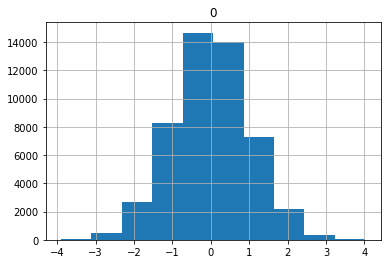

In [16]:
pop_sal_df=pd.DataFrame(pop_sal)
pop_sal_df.hist()

In [19]:
#convert all 50000 samples in real INR units (assume pop_mean(true_mean=6.78LPA,sigma=40k))
sal=pop_sal*40000+678000
sal[:50]#just for display

array([650440.18816621, 696755.81443549, 687389.19627987, 577756.73698671,
       680252.23970453, 667314.90670656, 702169.03126286, 604371.99263918,
       714377.71707805, 646829.52412998, 683683.72694913, 691232.142362  ,
       721821.70520121, 656616.62369856, 732765.70370266, 665166.57252265,
       668233.9903018 , 611905.56246847, 661503.73512871, 665964.43539245,
       629421.84009142, 664270.24106678, 695880.24398613, 721860.70182764,
       686795.62710355, 733167.93087388, 686468.0575932 , 666492.27814401,
       678659.88698166, 632251.08709472, 652891.3067268 , 663805.47579432,
       702513.78957679, 765021.64205576, 738109.13540897, 737951.70536068,
       643509.42933873, 696239.88287976, 715224.77919337, 696034.67589335,
       685827.22912836, 714394.02661737, 724932.3531023 , 722378.44347268,
       692728.57689258, 702100.39727511, 681792.80248471, 628897.39377278,
       703697.28426036, 621250.90480723])

In [20]:
np.mean(sal)

678089.8193874795

In [21]:
#Method-1 (as per the theoretical definition of CLT)
trial=[]
for itr in np.arange(100): 
  samp=[]
  for val in np.arange(500):
    samp.append(np.random.choice(sal))
  trial.append(np.mean(samp))

In [22]:
len(trial)

100

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcad11dbd68>]],
      dtype=object)

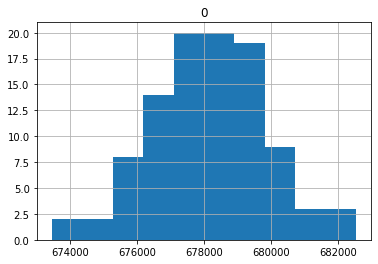

In [25]:
trial_df=pd.DataFrame(trial)
trial_df.hist()

In [24]:
np.mean(trial)

678166.1314576634

In [ ]:
np.mean(trial),np.std(trial,ddof=1)

(678171.6527113924, 1693.8784830311258)

In [26]:
#95% CI range estimate of pop_mean is given by
(678171.6527113924-1.96*1693.8784830311258,678171.6527113924+1.96*1693.8784830311258)

(674851.6508846513, 681491.6545381334)

In [27]:
#68% CI range estimate of pop_mean is given by
(678171.6527113924-1*1693.8784830311258,678171.6527113924+1*1693.8784830311258)

(676477.7742283612, 679865.5311944236)

In [ ]:
trial_df=pd.DataFrame(trial)
trial_df.std()

0    1693.878483
dtype: float64

In [ ]:
np.std(trial,ddof=1)

1693.8784830311258

In [ ]:
#(95% range of this sal)
678171.6527113924-1.96*1693.8784830311258

674851.6508846513

In [ ]:
678171.6527113924+1.96*1693.8784830311258

681491.6545381334

In [ ]:
#[6.74Lacs to 6.81Lacs]

In [ ]:
 #Method-2 (practical approach with approx)
samp=[]
for val in np.arange(500):
  samp.append(np.random.choice(sal))

In [ ]:
np.mean(samp),np.std(samp,ddof=1)

(681015.0281048274, 41018.99285935366)

In [ ]:
#Standard Error of Mean in practical approach 
sem=np.std(samp,ddof=1)/np.sqrt(500)
sem

1834.425128041865

In [ ]:
681015.0281048274-1.96*sem

677419.5548538653

In [ ]:
681015.0281048274+1.96*sem

684610.5013557895

In [ ]:
#De-moivre's approximation of Discrete Distribution with Standard Normal Distribution
#Generate Binomial distribution with p=0.5, n=25 and calculate P(x<=14)
stats.binom.cdf(14,25,0.5)

0.7878218889236449

In [ ]:
#If x is a normal random variable,mean=n*p, sd=npq
x_bar=25*.5
x_bar

12.5

In [ ]:
x_var=25*0.5*0.5
x_sd=np.sqrt(x_sd)

2.5

In [ ]:
(14-12.5)/2.5

0.6

*In discrete distribution, the histogram bars are centered on the numbers. This means P(x<=14) in Discrete distribution is actually the area under the bars  less than x=14.5, we need to account for that extra 0.5, while calculating the same area in continuous distribution


In [ ]:
(14.5-12.5)/2.5

0.8

In [ ]:
#we need to calculate the prob P(x<=14) which equals to P(z<=0.6)
stats.norm.cdf(0.6)

0.7257468822499265

In [ ]:
stats.norm.cdf(0.8)

0.7881446014166034

* Now we have approximated Discrete distribution using Normal Distribution [ 0.7878 = 0.7881 (approx)]